In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io , color , filters , exposure , transform , img_as_ubyte

## Image resizing and rescaling:


In [ ]:
url = "https://drive.google.com/uc?id=11LpbXBrEF005XA7k-Wd6W_VNnyXCOtg6"
image = io.imread(url)

(843, 719, 3)

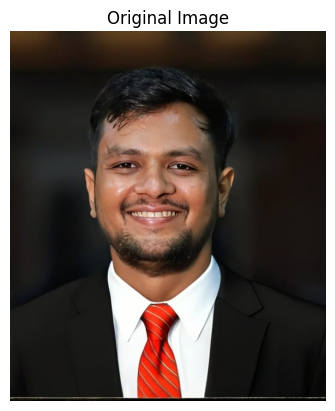

In [37]:
def dimage(image:np.array , title = 'Original Image'):
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    # plt.show()

dimage(image)

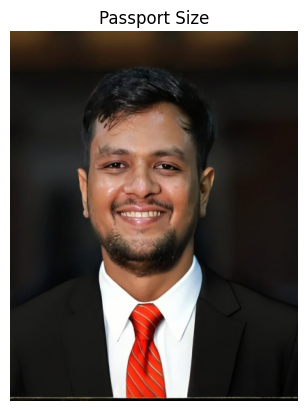

In [38]:
passport_size = transform.resize(image , (531 , 413))
dimage(passport_size , 'Passport Size')

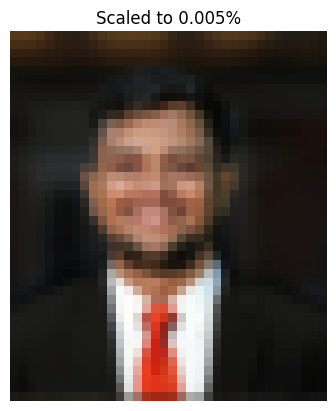

In [39]:
#rescale:
s50 = transform.rescale(image , 0.05 , channel_axis = -1)
dimage(s50 , 'Scaled to 0.005%')

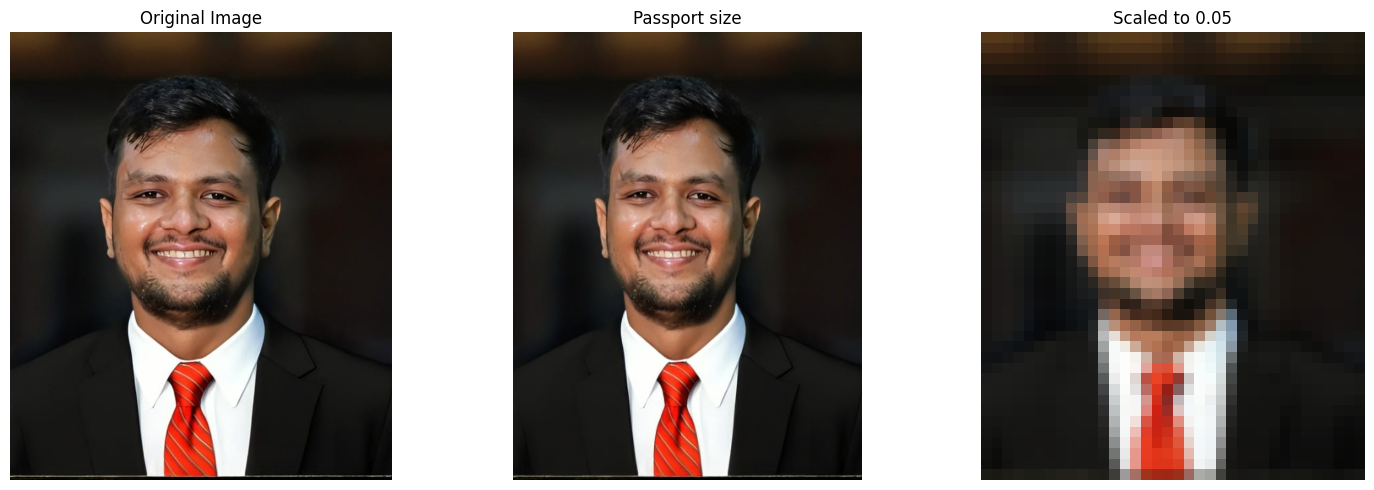

In [42]:
fig = plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
dimage(image)
plt.subplot(1 , 3 , 2)
dimage(passport_size , 'Passport size')

plt.subplot(1 , 3 , 3)
dimage(s50 , 'Scaled to 0.05')

plt.tight_layout()
plt.show()

## Rotation and Flipping


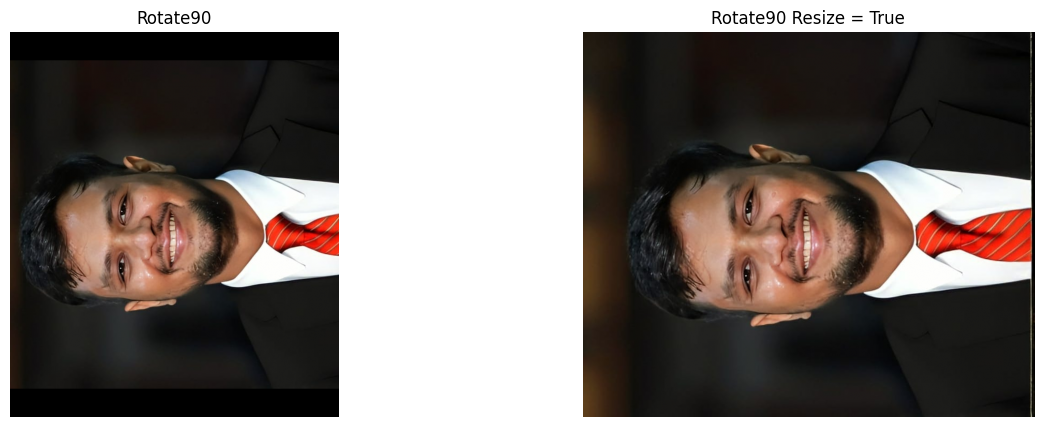

In [52]:
rotate90 = transform.rotate(image , angle = 90)

fig = plt.figure(figsize=(15,5))

plt.subplot(1 , 2, 1)
dimage(rotate90 , 'Rotate90')

r90rescaled = transform.rotate(image , angle = 90 , resize=True)

plt.subplot(1 , 2, 2)

dimage(r90rescaled , 'Rotate90 Resize = True')

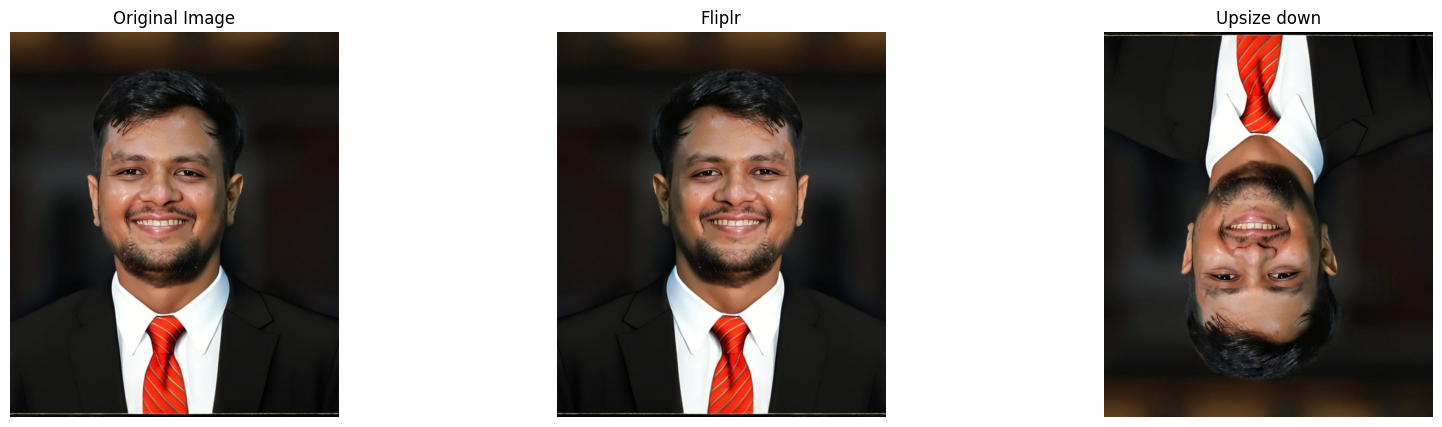

In [57]:
#filp:

lflip = np.fliplr(image)
fig = plt.figure(figsize = (20,5))

plt.subplot(1 , 3 , 1)
dimage(image)

plt.subplot(1,3,2)
dimage(lflip , 'Fliplr')

uflip = np.flipud(image)

plt.subplot(1 ,3, 3)
dimage(uflip , 'Upsize down')


## Intensity and cropping:


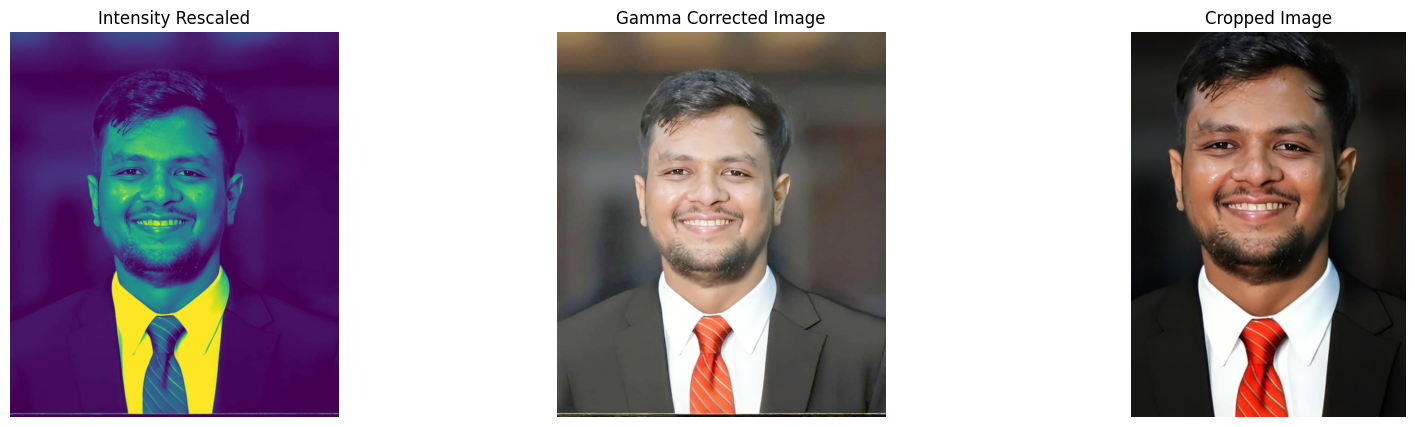

In [88]:
gimage = color.rgb2gray(image)

p2 , p98 = np.percentile(gimage , (10,95))

cimage = exposure.rescale_intensity(gimage , in_range = (p2 , p98))

fig = plt.figure(figsize = (20 , 5))
plt.subplot(1 , 3, 1)
dimage(cimage , 'Intensity Rescaled')

#adjust brightness in rgb image
gammaimage = exposure.adjust_gamma(image , gamma = 0.49)
plt.subplot(1 , 3, 2)
dimage(gammaimage , 'Gamma Corrected Image')


#cropped image
croppedimage = image[100:800 , 100:600 , :]
plt.subplot(1 , 3, 3)
dimage(croppedimage , 'Cropped Image')

## Sobel filter:


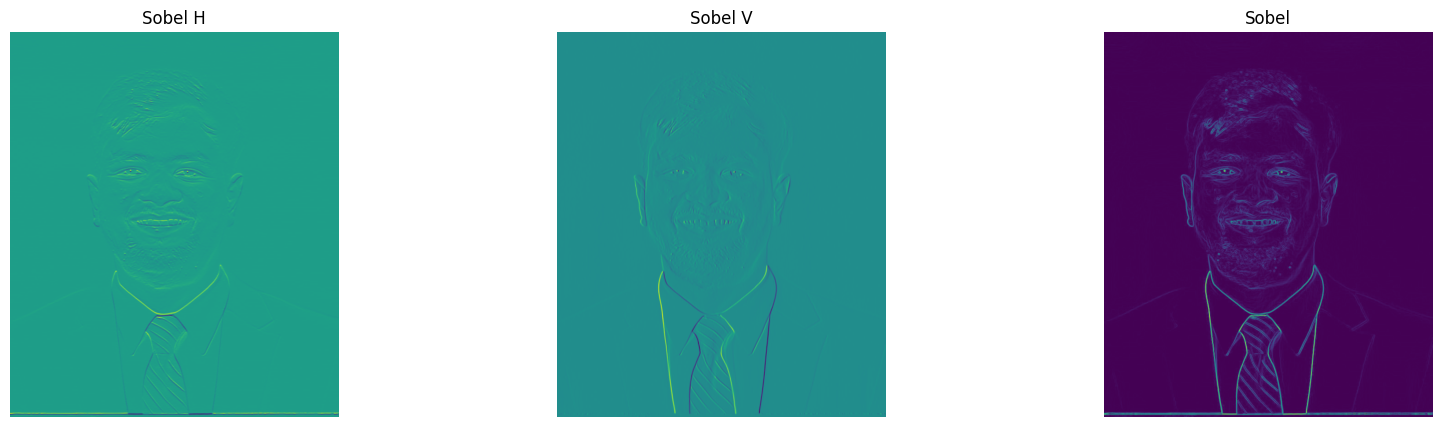

In [92]:
fig = plt.figure(figsize = (20 , 5))

sobx = filters.sobel_h(gimage)
soby = filters.sobel_v(gimage)
sobel = filters.sobel(gimage)
plt.subplot(1 , 3  , 1)
dimage(sobx , 'Sobel H')

plt.subplot(1 , 3  , 2)
dimage(soby , 'Sobel V')

plt.subplot(1 , 3, 3)
dimage(sobel , 'Sobel')